<a href="https://colab.research.google.com/github/Yoon0527/AIFFEL_Going_Deeper/blob/main/%5BGD_03%5D_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 잘 만든 Augmentation, 이미지 100장 안부럽다.
딥러닝 모델을 학습 시키기 위해서는 대량의 데이터를 확보해야 한다. 하지만 이런 데이터를 몇 만 장씩 구축하는 데는 많은 비용과 시간이 필요하다. 이때, 제한된 데이터셋을 최대한 활용하기 위해서 augmentation이라는 방법을 사용할 수 있다. 
* Data Augmentation
  * 갖고 있는 데이터셋을 여러 가지 방법으로 증강시켜(augment) 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법이다.
  * 일반적으로 하드디스크에 저장된 이미지 데이터를 메모리에 로드한 후, 학습시킬 때 변형을 가하는 방법을 사용한다.
  * 이를 통해 1장의 이미지를 더 다양하게 쓸 수 있게 된다.

데이터가 많아진다는 것은 과적합을 줄일 수 있다는 것을 의미한다. 또한 우리가 가지고 있는 데이터셋이 실제 상황에서의 입력값과 다를 경우, augmentation을 통해서 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수 있다. 

예를 들어, 우리가 학습한 데이터는 노이즈가 많이 없는 사진이지만, 테스트 이미지는 다양한 노이즈가 있는 경우 노이즈를 삽입해 모델이 이런 노이즈에 잘 대응할 수 있도록 해야 한다. 이렇게 data augmentation은 데이터를 늘릴 뿐만 아니라 **모델이 실제 테스트 환경에서 잘 동작할 수 있도록 도와주기도 한다.** 

## 다양한 Image Augmentation 방법
* Flipping
  * 이미지를 대칭하는 기능(좌우, 또는 상하)
  * 분류 문제에서는 문제가 없을 수 있지만, 물체 탐지(detection), 세그멘테이션(segmentation) 문제 등 **정확한 정답 영역이 존재하는 문제에 적용할 땐 라벨도 같이 반전을 해줘야 한다.**
  * 숫자나 알파벳 문자를 인식(recognition)하는 문제에 적용할 때도 주의해야 한다. 반전될 경우 다른 글자가 될 가능성이 있기 때문이다.
  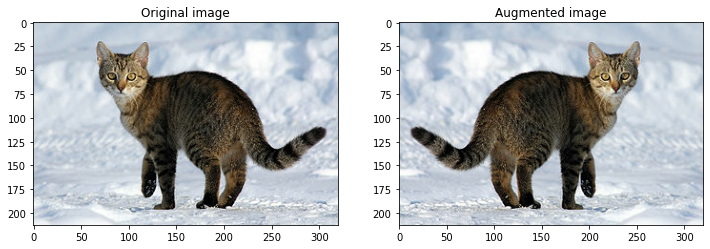


  * Gray Scale
    * 3가지 채널을 가진 RGB 이미지를 **하나의 채널을 가지도록 해준다**
    
  * Saturation
    * RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현)이미지로 변경하고, S 채널에 오프셋(offset)을 적용, 조금 더 이미지를 **선명하게 만들어 준다.**
    * 이후 다시 RGB 색상 모델로 변경을 해준다.
    > 색상 모델(gray, RGB, HSV, YCBCr)에 대해서 보통 이미지, 영상 관련 처리를 할 때 상황에 맞는 색상 모델을 정해야 한다. 이런 색상 모델에는 여러 가지 종류가 있다. 
    
    > Gray 모델 - 색(Color) 정보를 사용하지 않고, 밝기 정보만으로 영상을 표현하는 것입니다.검정 (0) 부터 흰색 (255) 까지 총 256 단계의 밝기 값(Intensity)으로 영상 픽셀 값을 표현합니다.

    > RGB 모델 - 가장 기본적인 색상 모델로, 색(Color)을 Red, Green, Blue의 3가지 성분의 조합으로 생각하는 것을 말합니다. RGB 모델에서 검은색은 R = G = B = 0, 흰색은 R = G = B = 255, 빨간색은 R = 255, G = B = 0, 노란색은 R = G = 255, B = 0으로 표현합니다. R = G = B 인 경우는 무채색인 Gray 색상이 됩니다. R, G, B 각각은 0 ~ 255 사이의 값을 가질 수 있으므로, RGB 색상 모델을 사용하면 총 256 256 256 = 16,777,216 가지의 색을 표현할 수 있습니다. ex)(0, 0, 0) : 검정,(255, 255, 255) : 흰색,(255, 0, 0) : 빨강,(0, 255, 0) : 초록,(0, 0, 255) : 파랑

    > HSV 모델 - Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현합니다. Hue는 색조 ( 예 : 붉은색 계열인지 푸른색 계열인 지) 를 나타내고, Saturation은 그 색이 얼마나 선명한(순수한) 색인지, Value 는 밝기(Intensity)를 나타냅니다. HSV 모델은 우리가 색을 가장 직관적으로 표현할 수 있는 모델이고, 머리속에서 상상하는 색을 가장 쉽게 만들어낼 수 있는 모델입니다. 영상처리 / 이미지 처리 에서 HSV 모델을 사용할 때, H, S, V 각각은 0 ~ 255 사이의 값으로 표현됩니다. H 값은 색의 종류를 나타내기에 크기는 의미가 없으며 단순한 인덱스(Index)를 나타냅니다. S 값은 0이면 무채색 (gray 색), 255면 가장 선명한(순수한) 색임을 나타냅니다. V 값은 작을수록 어둡고, 클수록 밝은 색임을 나타냅니다. HSV 색상 모델은 그림과 같이 원뿔(conic) 형태, 원기둥(cylindric) 형태가 있습니다.

    > YCbCr 모델 - RGB 색에서 밝기 성분(Y)과 색차 정보(Cb, Cr)를 분리하여 표현하는 색상 모델입니다.디지털 영상에서 Y, Cb, Cr 은 각각 0 ~ 255 사이의 값을 가지며, Y가 커지면 그림이 전체적으로 밝아지고, Y가 작아지면 전체적으로 어두워집니다.YCbCr 모델은 mpeg에서 사용되는 색상모델로써, 인간의 눈이 밝기 차에는 민감하지만, 색차에는 상대적으로 둔감하다는 점을 이용해서 Y에서 많은 비트 수(해상도)를 할당하고 Cb, Cr에는 낮은 비트 수를 할당하는 방식으로 비디오를 압축합니다. 따라서 비디오 데이터를 처리할 경우에 YCbCr 모델을 사용하면 별도의 색상 변환을 하지 않아도 되는 장점을 가지고 있습니다.또한, YCbCr 모델은 YUV 모델로도 불립니다.

  * Brightness
    * 밝기 조절
    * RGB에서 (255, 255, 255)는 흰색을, (0,0,0)은 검은색을 의미한다.
    * 따라서 이미지는 RGB채널에서 값을 더해주면 밝아지고, 빼주면 어두워진다.

  * Rotation
    * 이미지의 각도를 변환해준다.
    * 90도의 경우 직사각형 형태가 유지되기 때문에 이미지의 크기만 조절해주면 바로 사용할 수 있다.
    * 하지만 90도 단위로 돌리지 않는 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의해야 한다.

  * Center Crop
    * 이미지의 중앙을 기준으로 확대하는 방법
    * 너무 작게 center crop을 할 경우 본래 가진 라벨과 맞지 않게 되는 상황이 발생할 수 있으니 주의가 필요.
    * 예를 들어 고양이 라벨의 이미지를 확대해 한 장 더 만들어내려면, 이미지 내의 고양이의 형상을 유지해야 하고 털만 보이는 이미지를 만들어서는 안된다.

  * 이외에도 Gaussian noise, Contrast change, Sharpen, Affine transformation, Padding, Blurring과 같은 기법이 있다.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## 텐서플로우를 사용한 Image Augmentation (1) Flip

In [ ]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

sample_img_path = '/content/gdrive/MyDrive/aiffel/GD-03/mycat.jpg'
sample_img_path

'/content/gdrive/MyDrive/aiffel/GD-03/mycat.jpg'

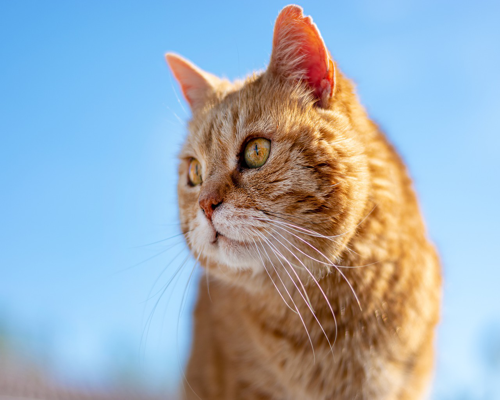

In [ ]:
# 이미지 리사이징(500, 400)

image = Image.open(sample_img_path).resize((500, 400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

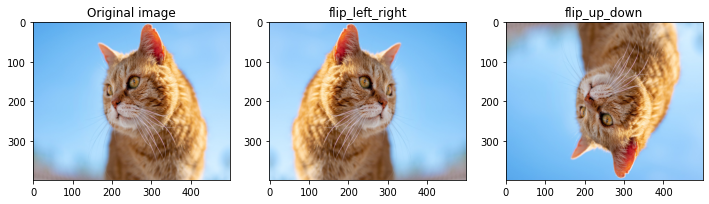

In [ ]:
# Flip 해보기

flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1, 3, 3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

위의 함수들은 일괄적으로 항사 또는 좌우 반전을 적용한다. 우리는 이를 확률에 따라서 적용되도록 해야한다. 그래야 반전이 되지 않은 원본 데이터도 활용이 될 수 있기 때문이다. 이를 위해서 활용할 수 있는 것이 random_flip_left_right와 random_flip_up_down이다. 필요에 따라서는 직접 이 둘을 합쳐 random_flip으로 상하죄우 반전을 적용하는 함수를 직접 만들어 볼 수 있음. 

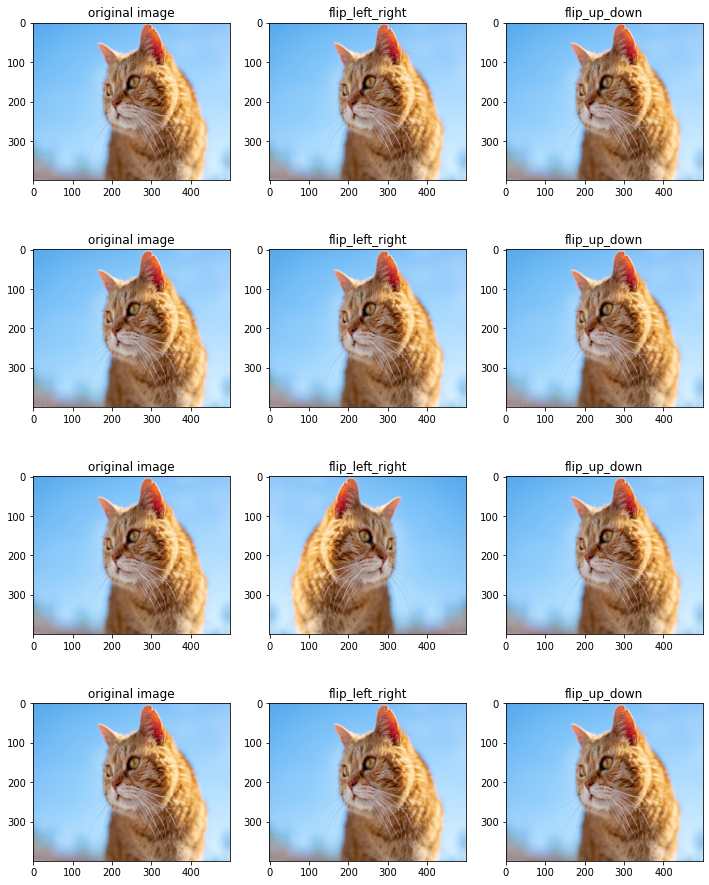

In [ ]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
  flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
  flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
  flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
  flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

  plt.subplot(4, 3, i*3+1)
  plt.title('original image')
  plt.imshow(image)

  plt.subplot(4, 3, i*3+2)
  plt.title('flip_left_right')
  plt.imshow(flip_lr_image)

  plt.subplot(4, 3, i*3+3)
  plt.title('flip_up_down')
  plt.imshow(flip_ud_image)

## 텐서플로우를 사용한 Image Augmentation (2) Center Crop
Center Crop은 중앙을 기준으로 자른 이미지를 사용하는 기법이다.

단순하게 중심점을 기준으로 사진을 확대하는 것으로 생각하기 쉽지만, 적용할 때 주의해 사용해야한다. 'central_fraction'은 얼마나 확대 할지를 조절하는 매개변수이다. 1.0인 경우는 원본 이미지와 같다. 그러나 예를 들어 고양이 이미지를 확대하면 0.5까지는 보일 수 있지만 0.25 수준으로 내려가면 털만 보이고 고양이의 형상을 찾기 어려울 수 있다. 따라서 central_fraction의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야 한다.

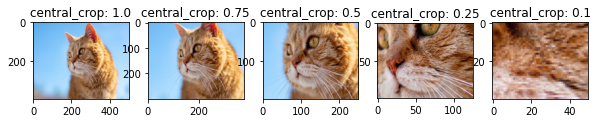

In [ ]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)

for i, frac in enumerate(central_fractions):
  cropped_tensor = tf.image.central_crop(image_tensor, frac)
  cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

  plt.subplot(1, col+1, i+1)
  plt.title(f'central_crop: {frac}')
  plt.imshow(cropped_img)

랜덤하게 central_crop을 적용하는 함수는 기본적으로 제공되지 않는다. 파이썬의 random 모듈을 사용해도 되고 텐서플로우의 랜덤 모듈을 사용해도 된다.

In [ ]:
# tf.random.uniform을 사용해 central_fraction 매개 변수에 전달할 값을 만들고
# 이를 사용해 cropped_tensor를 만들어내는 random_central_crop() 함수

def random_central_crop(image_tensor, range=(0, 1)):
  central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
  cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
  return cropped_tensor

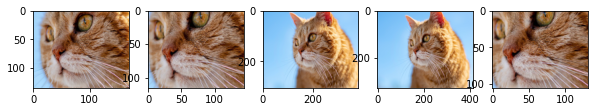

In [ ]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## 텐서플로우를 사용한 Image Augmentation (3) 직접해보기

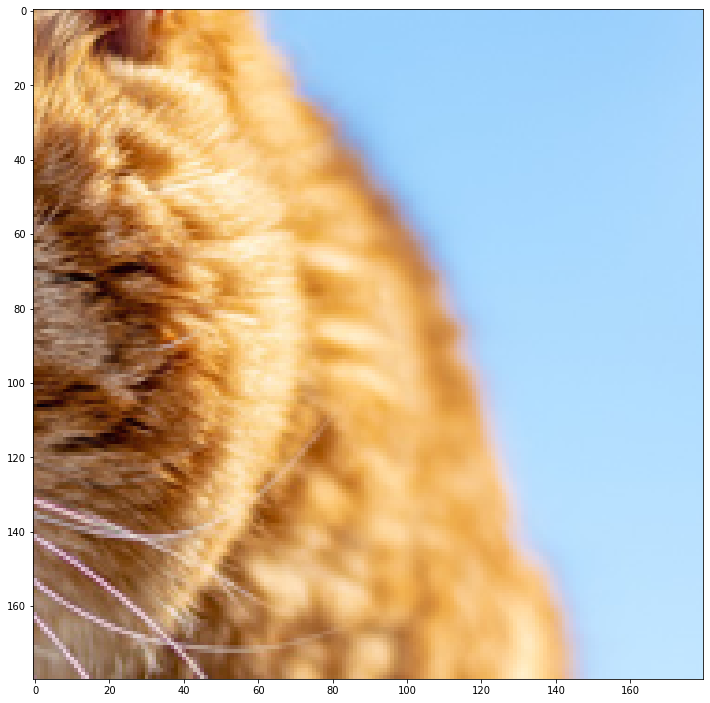

In [ ]:
# tf.image.random_crop()
# apply random_crop on cat image

plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor, [180, 180, 3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

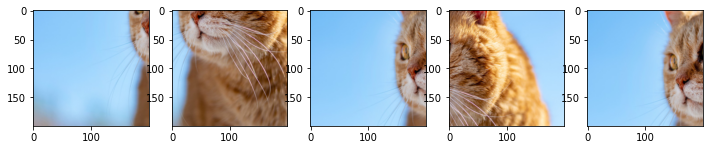

In [ ]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

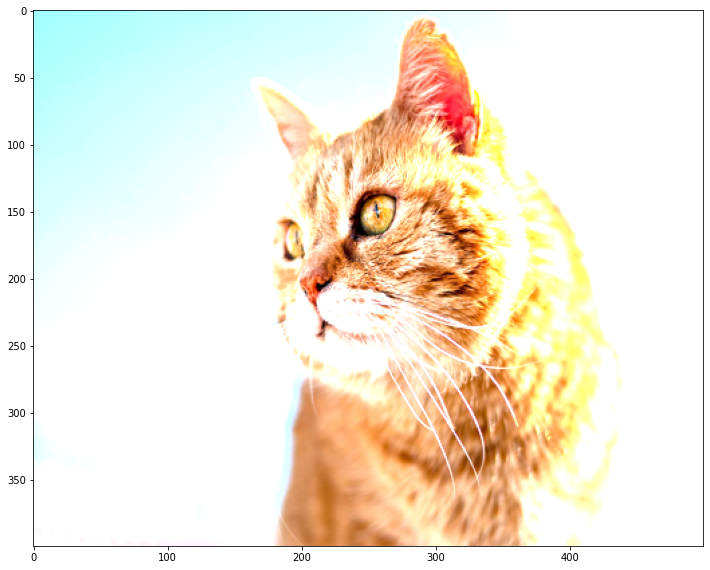

In [ ]:
# tf.image.random_brightness()
'''
plt.figure(figsize=(12, 15))

random_brt_tensor = tf.image.random_brightness(image_tensor, 0.5)
random_brt_img = tf.keras.preprocessing.image.array_to_img(random_brt_tensor)

plt.imshow(random_brt_img)
plt.show()
'''
# apply random_brightness on cat image
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

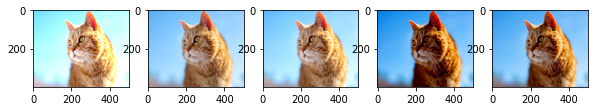

In [ ]:

# display 5 random brightness images
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

# albumentations 라이브러리
augmentation만을 모아서 제공하는 전문 라이브러리들이 있다. 그 중 Albumentations는 이미지 증강을 위한 Python 라이브러리이다. 이미지 증강은 딥러닝 및 컴퓨터 비전 작업에서 훈련된 모델의 품질을 높이는 데 사용된다.


augmentation에서는 배열을 이미지의 기본 형태로 사용한다. 따라서 PIL Image 데이터형을 넘파이 배열로 변환하여 사용한다.

In [ ]:
import numpy as np

image = Image.open(sample_img_path).resize((400, 300))
image_arr = np.array(image)
image_arr.shape

(300, 400, 3)

In [ ]:
# 편하게 이미지를 볼 수 있는 함수

def visualize(image):
  plt.figure(figsize=(20, 10))
  plt.imshow(image)

### transforms.Affine()
아핀 변환(Affine transform)은 2D 변환의 일종으로 이미지의 스케일을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있다.

In [ ]:
import albumentations as A

for i in range(10):
    transform = A.Compose([
        A.Affine(rotate=(-45, 45),scale=(0.5,0.9),p=0.5) 
    ])
    transformed = transform(image=image_arr)
    plt.figure(figsize=(12,12))
    plt.imshow((transformed['image']))
    plt.show()

AttributeError: ignored

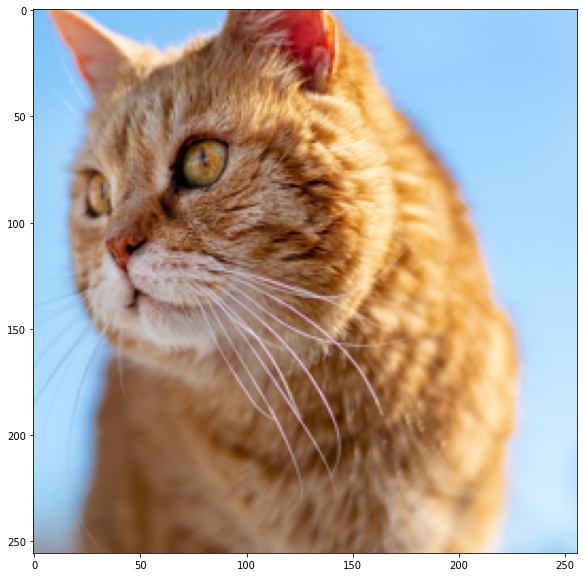

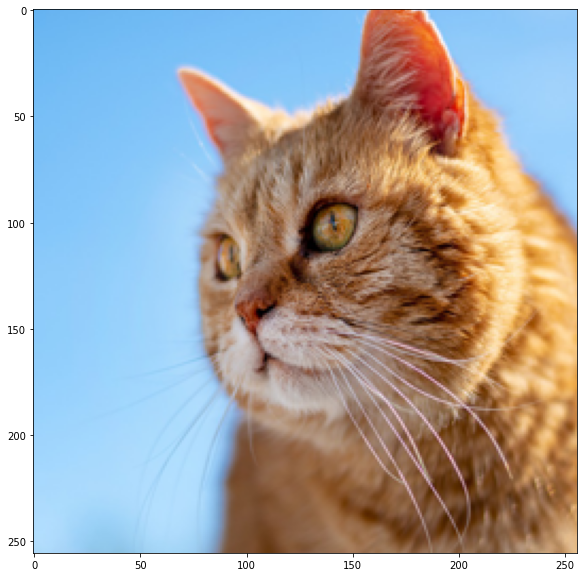

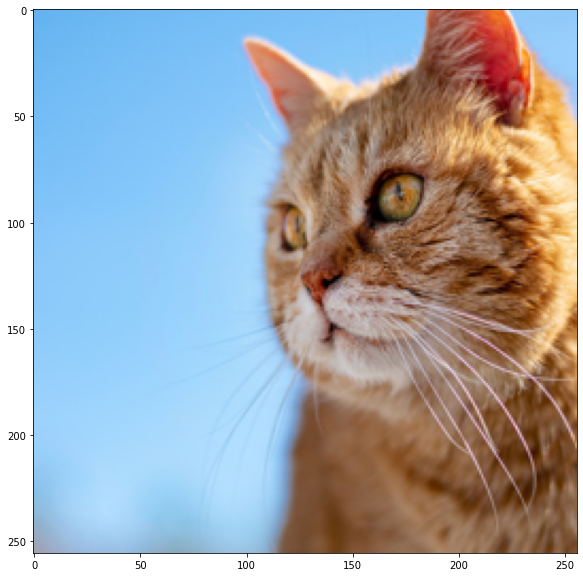

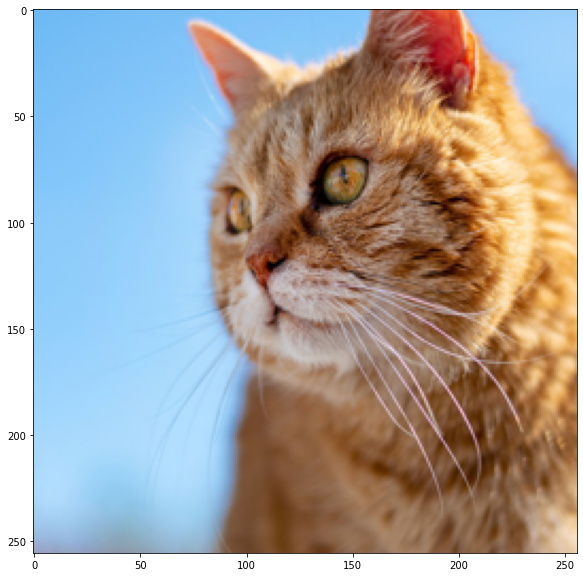

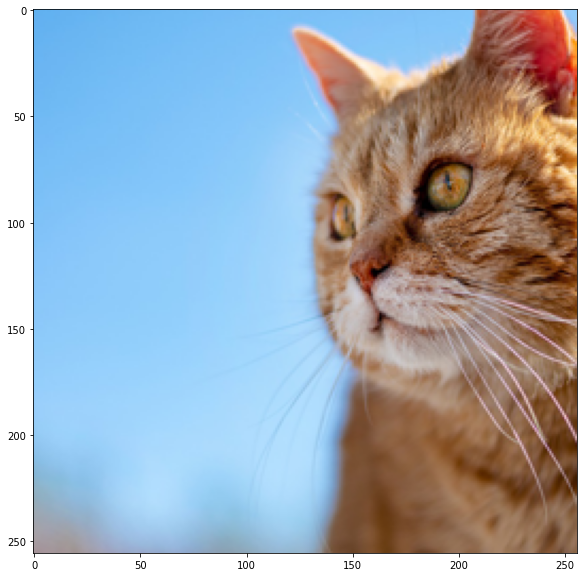

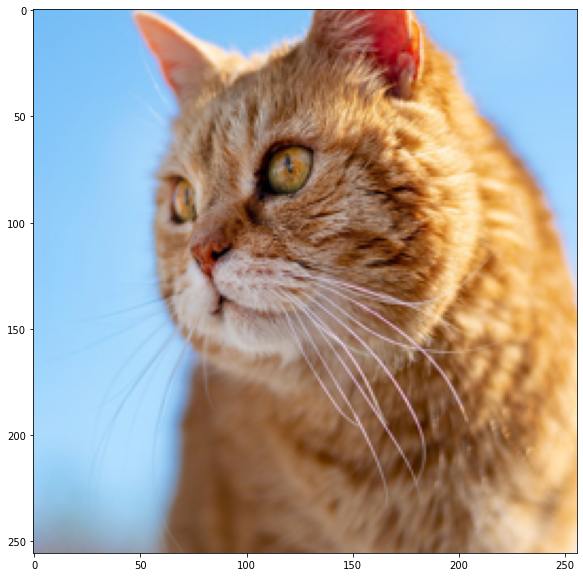

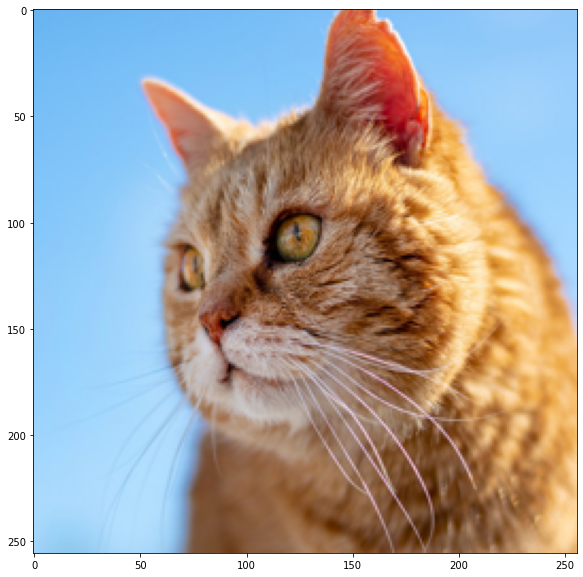

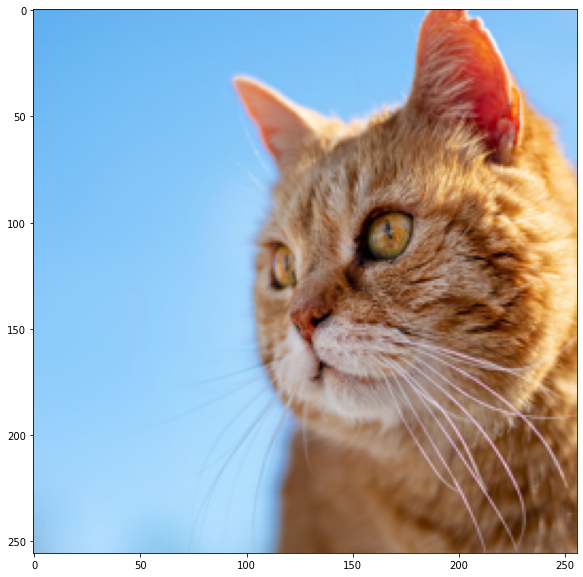

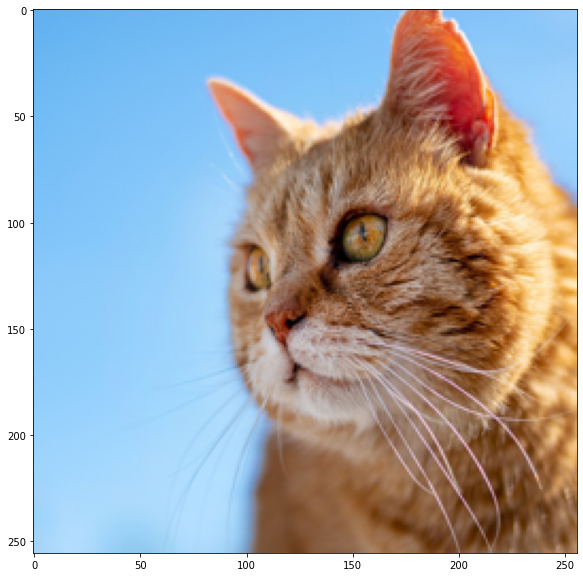

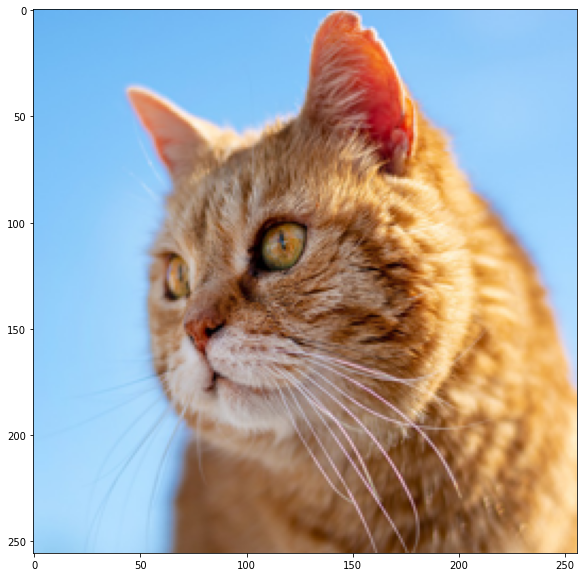

In [ ]:
import random
for i in range(10):
    transform = A.Compose(
        [A.RandomCrop(width=256, height=256)]
    )
    transformed = transform(image=image_arr)
    visualize(transformed['image'])

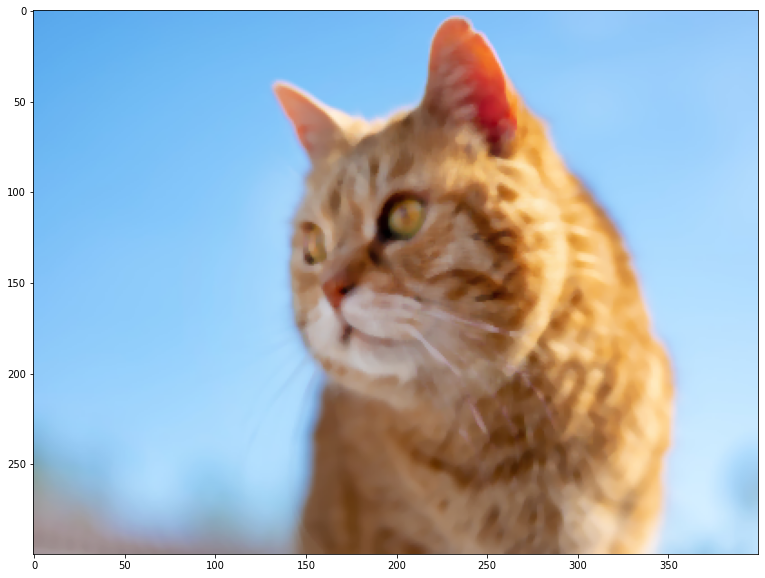

In [ ]:
# MedianBlur()
# 블러처리

transform = A.Compose([A.MedianBlur(blur_limit=20, always_apply=False, p=0.5)])
transformed = transform(image=image_arr)
visualize(transformed['image'])

In [ ]:
# ToGray(), MultiplicativeNoise()
# 여러 augmentation 기법을 순차적으로 적용

transform = A.Compose([A.ToGray(p=1),
                       A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)])

transformed = transform(image = image_arr)
visualize(transformed['image'])

AttributeError: ignored

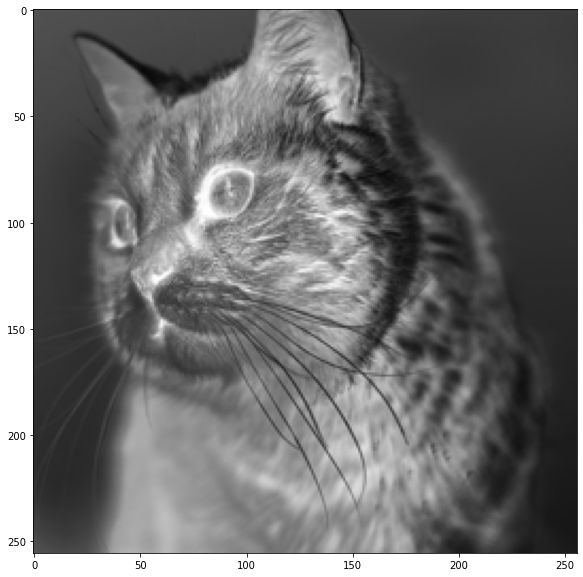

In [ ]:
# ToGray, RandomCrop
transform = A.Compose([A.ToGray(p=1),
                       A.RandomCrop(width=256, height=256)])

transformed = transform(image = image_arr)
visualize(transformed['image'])

In [ ]:
# Use various techniques and functions in albumentations library. show 100 images.

def transform_data(img_arr):
    transform = A.Compose(
    [A.ToGray(p=1),
    A.MultiplicativeNoise(multiplier=[0.5, 1.5], 
                          elementwise=True, per_channel=True, p=1),
     A.RandomCrop(width=256, height=256)
    ]
    )
    t_image = transform(image=img_arr)
    t_image = t_image['image']
    return t_image

plt.figure(figsize=(18,20))
for i in range(100):
    image = transform_data(image_arr)
    plt.subplot(10,10,i+1)
    plt.imshow(image)

AttributeError: ignored

<Figure size 1296x1440 with 0 Axes>